In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("bestsellers with categories.csv")
print(df.shape)
print(df.columns)

(550, 7)
Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')


In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


What is the reviews,price and user trainig in different years in term of Genre?
Are User Rating and Reviews have relations?
Does statistically price affect  number of years reviews?
is  there statistically different between Fiction and non fiction in terms of Reviews, User Rating,Price?
is there are significantly change between year and reviews
which three authors have most books in TOP 50 Sales?

In [4]:
df.shape

(550, 7)

In [5]:
df.isnull().any()

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

In [6]:
df.duplicated().any()


False

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


# Descriptive Statistic and EDA

In [8]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


<Axes: xlabel='Price', ylabel='Density'>

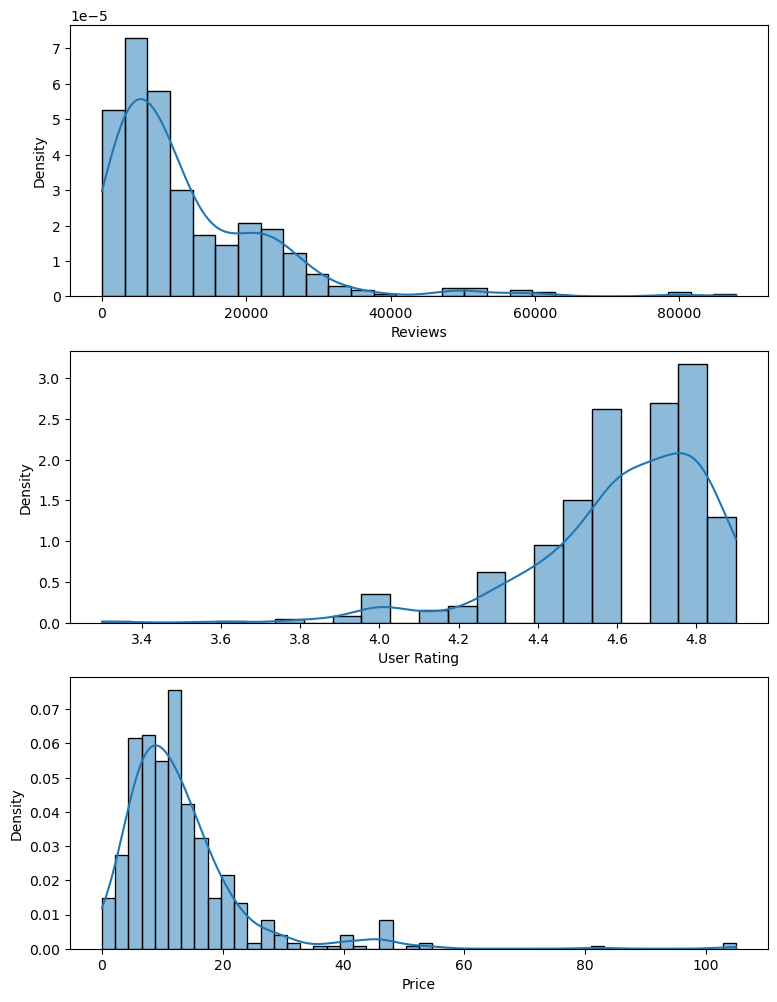

In [9]:
fig,axes=plt.subplots(nrows=3,ncols=1,figsize=(9,12))
sns.histplot(df["Reviews"],kde=True,ax=axes[0],stat="density" )
sns.histplot(df["User Rating"],kde=True,ax=axes[1],stat="density")
sns.histplot(df["Price"],kde=True,ax=axes[2],stat="density")



Three variables are normally distributed, but price and reviews have outliers. These are in this list even though they differ from other.


<Axes: xlabel='Price', ylabel='Reviews'>

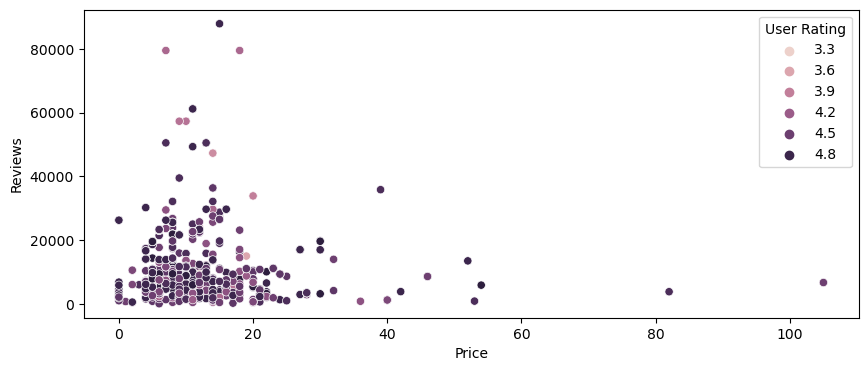

In [10]:
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(df,x="Price",y="Reviews",hue="User Rating",)

As we see in scatter plot, Reviews and Price have positive correlation, but most of them data are placed in Lower Price and Lower Reviews. Hence, We will first find outliers then we will find whether there are statistically correlation between three variables. In the first views, there are positive correlation between price and reviews, but correlation is not seen as a high. 

In [11]:
df[df["Price"]>=60]

,Name,Author,User Rating,Reviews,Price,Year,Genre
69,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2013,Non Fiction
70,Diagnostic and Statistical Manual of Mental Di...,American Psychiatric Association,4.5,6679,105,2014,Non Fiction
473,The Twilight Saga Collection,Stephenie Meyer,4.7,3801,82,2009,Fiction


In [12]:
df[df["Reviews"]>=60000]

,Name,Author,User Rating,Reviews,Price,Year,Genre
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [13]:
df.sort_values(by="Reviews",ascending=False)

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
...,...,...,...,...,...,...,...
359,The Daily Show with Jon Stewart Presents Earth...,Jon Stewart,4.4,440,11,2010,Non Fiction
512,True Compass: A Memoir,Edward M. Kennedy,4.5,438,15,2009,Non Fiction
121,George Washington's Sacred Fire,Peter A. Lillback,4.5,408,20,2010,Non Fiction
300,Soul Healing Miracles: Ancient and New Sacred ...,Zhi Gang Sha,4.6,220,17,2013,Non Fiction


Although "The Twilight Saga Collection "and "Diagnostic and Statistical Manual of Mental Di..."	have extremely high price, they are in top sellers in their years. 

The Girl on the Train	(2015,2016) and Becoming (2017,2018) are the most reviewed books in consecutive years. In 2019, Where the Crawdads Sing	 reached highest review number in 2019. Interestingly, The Girl on the Train has lower rating although it was reviewed higher than  many of of them.

<Axes: xlabel='Price', ylabel='Reviews'>

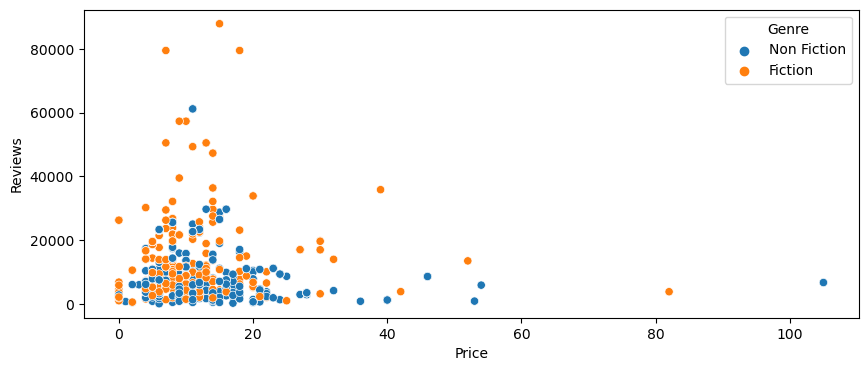

In [14]:
plt.figure(figsize=(10,4),dpi=100)
sns.scatterplot(df,x="Price",y="Reviews",hue="Genre")

In [15]:
df[(df["Reviews"]>=60000) & (df["Genre"]=="Fiction")]

,Name,Author,User Rating,Reviews,Price,Year,Genre
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [16]:
df[df["Reviews"]>=17253.250000][["Genre"]].value_counts(
)

Genre      
Fiction        84
Non Fiction    54
Name: count, dtype: int64

Hence, we can assert that different Genre is be the reason why outliers reviews is much more than others, but it is hard to make predciton with these data

Now,  How do  reviews,price and user trainig  changed in years in term of Genre?

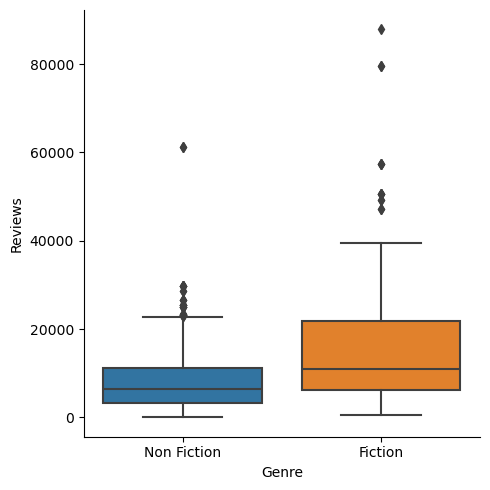

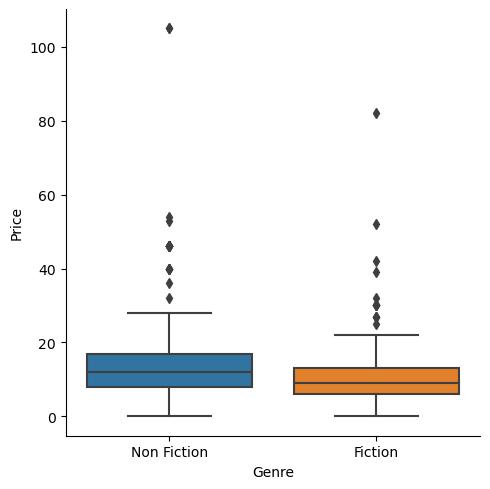

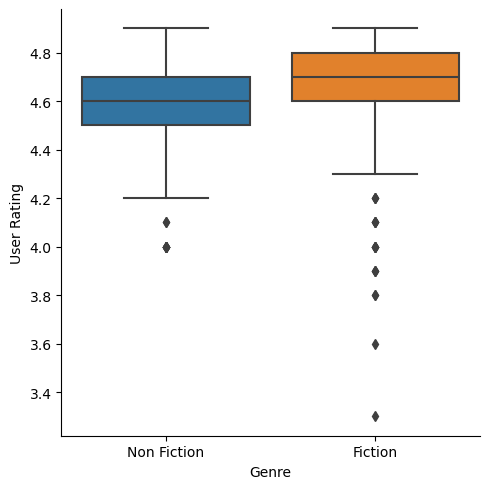

In [17]:

sns.catplot(data=df,x="Genre",y="Reviews",kind="box")
sns.catplot(data=df,x="Genre",y="Price",kind="box")
sns.catplot(data=df,x="Genre",y="User Rating",kind="box")


<Axes: xlabel='Year', ylabel='User Rating'>

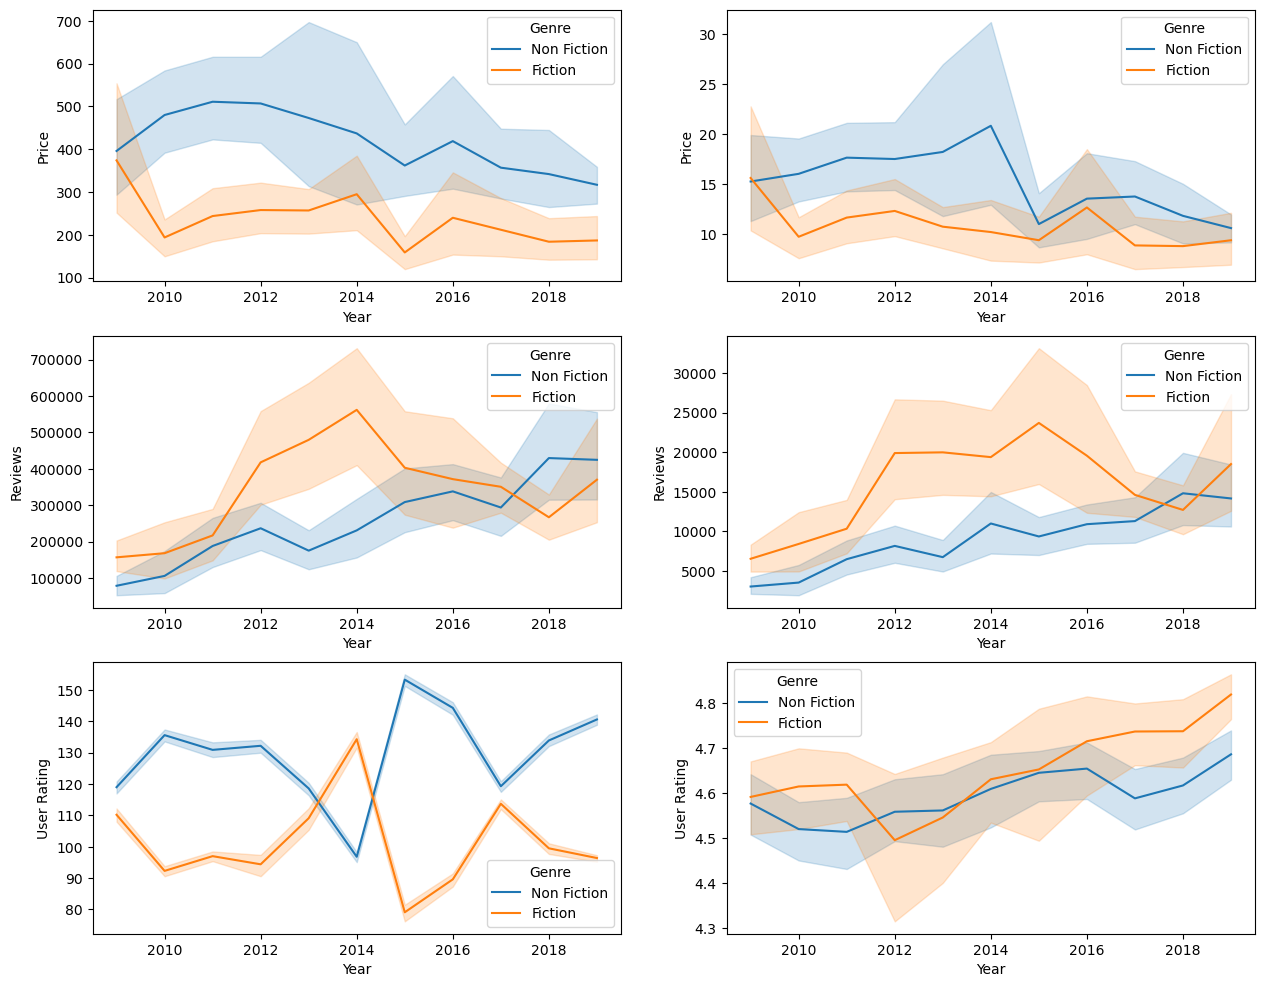

In [18]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(15,12))
sns.lineplot(data=df,x="Year",y="Price",hue="Genre",ax=axes[0][0],estimator=np.sum)
sns.lineplot(data=df,x="Year",y="Reviews",hue="Genre",ax=axes[1][0],estimator=np.sum)
sns.lineplot(data=df,x="Year",y="User Rating",hue="Genre",ax=axes[2][0],estimator=np.sum)
sns.lineplot(data=df,x="Year",y="Price",hue="Genre",ax=axes[0][1],estimator=np.mean)
sns.lineplot(data=df,x="Year",y="Reviews",hue="Genre",ax=axes[1][1],estimator=np.mean)
sns.lineplot(data=df,x="Year",y="User Rating",hue="Genre",ax=axes[2][1],estimator=np.mean)



When we look at the price, people paid non-fiction novel in consecutive years.After a slight rise after  2010, total price that has been paid for non-fiction level decreased. However, there is not much more gap between price in terms of the Genre, but general trend with total price is same.

In terms of the total reviews,non fiction novels increase in the consecutive years and it passes fiction novel after 2017. 

In user rating, sum of user rating is so complex and it changes according to number of the novels in each Genre. However, there are regular increase in user rating. 

When we look athe price and reviews, price and reviews are seen as a negative correlation for non fiction novels, but whether price statistically affects reviews or not .

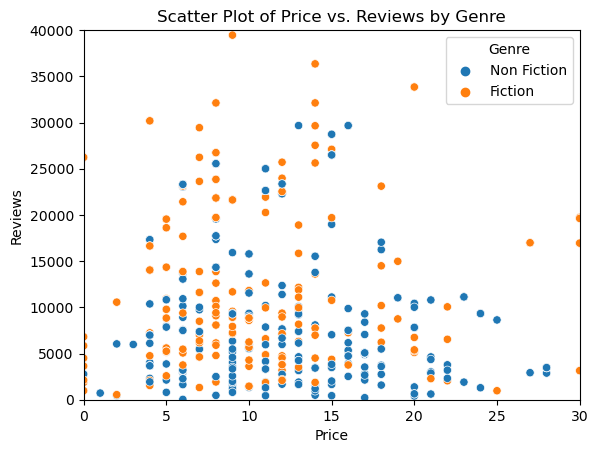

In [19]:


sns.scatterplot(data=df, x='Price', y='Reviews', hue='Genre')

plt.xlabel('Price')
plt.ylabel('Reviews')
plt.title('Scatter Plot of Price vs. Reviews by Genre')

plt.legend(title='Genre')
plt.xlim(0,30)
plt.ylim(0,40000)

plt.show()


In [20]:
from scipy.stats import pearsonr
correlation, p_value=pearsonr(df['Price'], df['Reviews'])
if p_value <0.05:
    print(f"Correlation : {correlation:.2f}( statistically significant)")
    print(f"P_value is : {p_value:.2f}")
else:
    print(f"Correlation : {correlation:.2f}(not statistically significant)")
    print(f"P_value is : {p_value:.2f}")



Correlation : -0.11( statistically significant)
P_value is : 0.01


There are statistically correlation between two variable, although we could not understand by looking visuals. However if we look at the fiction and non fiction, we can see more powerfull correlations.

In [21]:
from scipy.stats import pearsonr
correlation, p_value=pearsonr(df[df['Genre']=="Fiction"]["Price"], df[df['Genre']=="Fiction"]['Reviews'])
if p_value <0.05:
    print(f"Correlation : {correlation:.2f}( statistically significant)")
    print(f"P_value is : {p_value:.2f}")
else:
    print(f"Correlation : {correlation:.2f}(not statistically significant)")
    print(f"P_value is : {p_value:.2f}")


Correlation : 0.02(not statistically significant)
P_value is : 0.74


In [22]:
from scipy.stats import pearsonr
correlation, p_value=pearsonr(df[df['Genre']=="Non Fiction"]["Price"], df[df['Genre']=="Non Fiction"]['Reviews'])
if p_value <0.05:
    print(f"Correlation : {correlation:.2f}( statistically significant)")
    print(f"P_value is : {p_value:.2f}")
else:
    print(f"Correlation : {correlation:.2f}(not statistically significant)")
    print(f"P_value is : {p_value:.2f}")


Correlation : -0.15( statistically significant)
P_value is : 0.01


Hence, price may only affect non-fiction novel.

In [23]:
from scipy.stats import ttest_ind
correlation, p_value=ttest_ind(df[df['Genre']=="Non Fiction"]["Price"], df[df['Genre']=="Non Fiction"]['Price'])
if p_value <0.05:
    print("Hypothesis:there is not significantly differences between price in terms of the Genre")
    print(f" Reject the hypothesis. Correlation : {correlation:.2f}( statistically significant)")
    print(f"P_value is : {p_value:.2f}")
else:
    print("Hypothesis:there is not significantly differences between price in terms of the Genre")
    print(f"Not  reject the hypothesis.Correlation : {correlation:.2f}(not statistically significant)")
    print(f"P_value is : {p_value:.2f}")


Hypothesis:there is not significantly differences between price in terms of the Genre
Not  reject the hypothesis.Correlation : 0.00(not statistically significant)
P_value is : 1.00


In [24]:
correlation, p_value=ttest_ind(df[df['Genre']=="Non Fiction"]["Reviews"], df[df['Genre']=="Non Fiction"]['Reviews'])
if p_value <0.05:
    print("Hypothesis:there is not significantly differences between price in terms of the Genre")
    print(" Reject the hypothesis")
    print(f"P_value is : {p_value:.2f}")
else:
    print("Hypothesis:there is not significantly differences between price in terms of the Genre")
    print(f"Not reject the hypothesis")
    print(f"P_value is : {p_value:.2f}")


Hypothesis:there is not significantly differences between price in terms of the Genre
Not reject the hypothesis
P_value is : 1.00


When we look at the price and reviews, we assumed  that there are outliers that are caused by Genre. However, as ttest proved, Genre is not the reason.

In [25]:
correlation, p_value=ttest_ind(df[df['Genre']=="Non Fiction"]["User Rating"], df[df['Genre']=="Non Fiction"]['User Rating'])
if p_value <0.05:
    print("Hypothesis:there is not significantly differences between price in terms of the Genre")
    print(" Reject the hypothesis")
    print(f"P_value is : {p_value:.2f}")
else:
    print("Hypothesis:there is not significantly differences between price in terms of the Genre")
    print(f"Not reject the hypothesis")
    print(f"P_value is : {p_value:.2f}")

Hypothesis:there is not significantly differences between price in terms of the Genre
Not reject the hypothesis
P_value is : 1.00


<Axes: title={'center': 'Total Amount of Reviews by Years'}, xlabel='Year', ylabel='Reviews'>

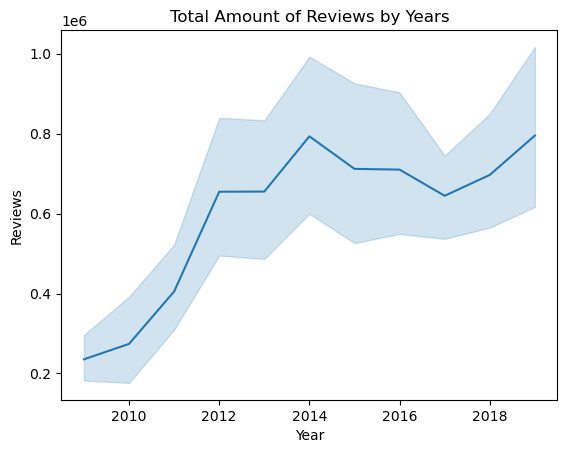

In [26]:
plt.title("Total Amount of Reviews by Years")
sns.lineplot(df,x="Year",y="Reviews",estimator=np.sum)

In [27]:
from scipy.stats import pearsonr
correlation, p_value=pearsonr(df['Year'], df['Reviews'])
if p_value <0.05:
    print(f"Correlation : {correlation:.2f}( statistically significant)")
    print(f"P_value is : {p_value:.2f}")
else:
    print(f"Correlation : {correlation:.2f}(not statistically significant)")
    print(f"P_value is : {p_value:.2f}")

Correlation : 0.26( statistically significant)
P_value is : 0.00


Statistic supports the graph. There are positive weak correlation.

<BarContainer object of 5 artists>

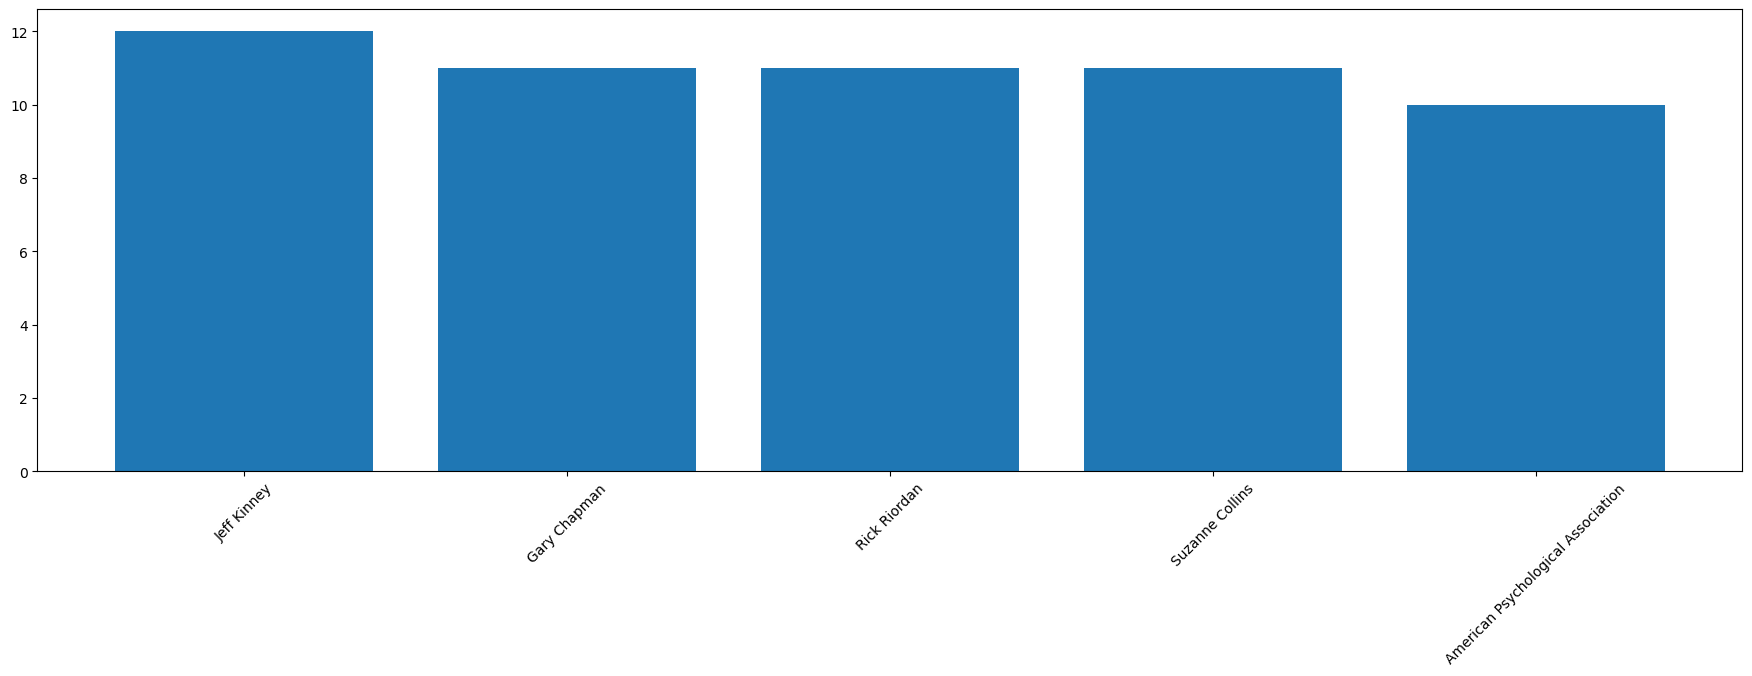

In [28]:
plt.figure(figsize=(22, 6))
top_authors = df["Author"].value_counts().head(5)

values = top_authors.values
names = top_authors.index
plt.xticks(rotation=45)

plt.bar(names, values)

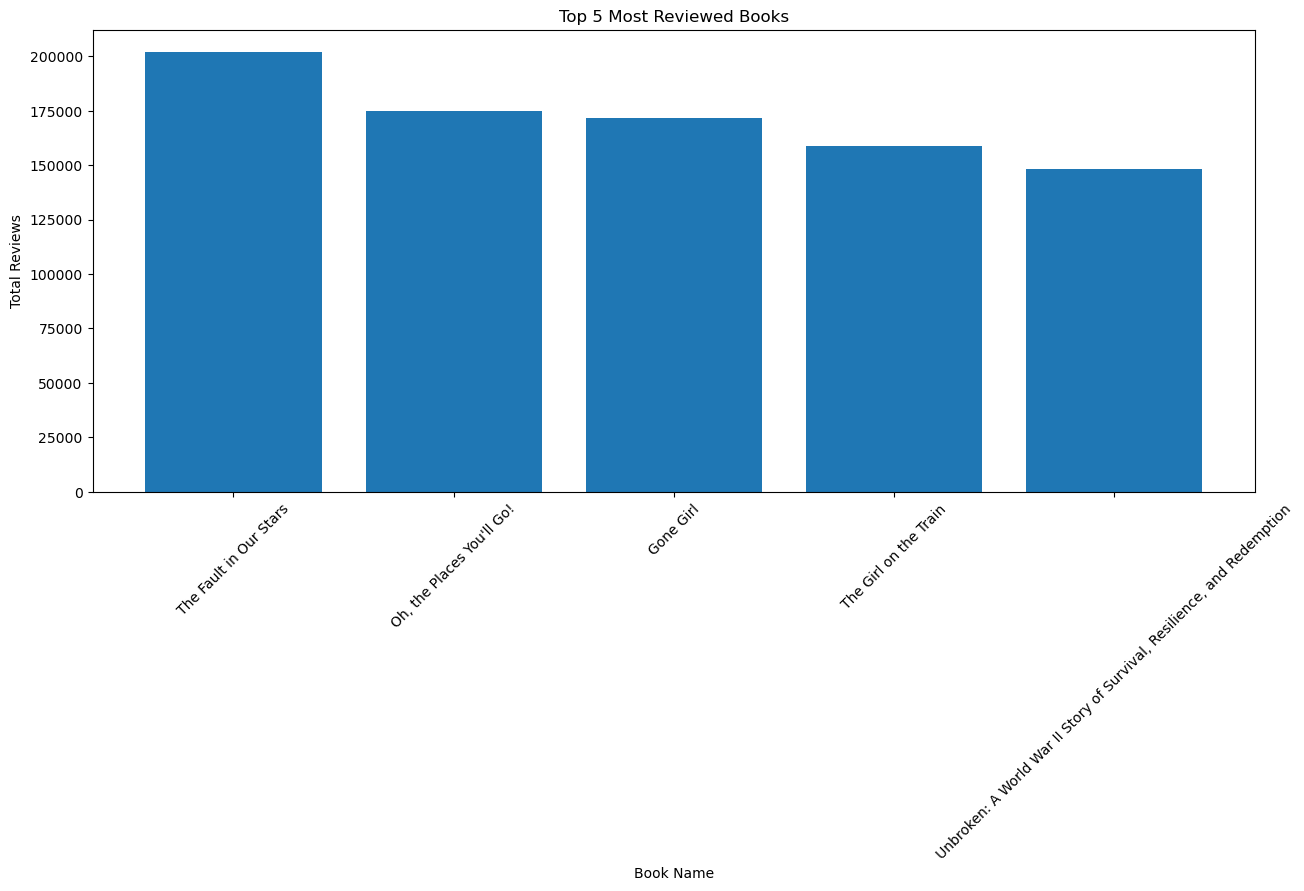

In [29]:



most_reviewed_books = df.groupby("Name")["Reviews"].sum().sort_values(ascending=False).head()

plt.figure(figsize=(15, 6))
values = most_reviewed_books.values
names = most_reviewed_books.index

plt.bar(names, values)

# Add labels and title
plt.xlabel("Book Name")
plt.ylabel("Total Reviews")
plt.title("Top 5 Most Reviewed Books")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()
